In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Let's read in the census person dataset - pppub19.csv
ppdf = pd.read_csv('../data/pppub19_updated.csv')
ppdf.head()

,PERIDNUM,GESTCEN,PH_SEQ,GTCBSA,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,...,I_DISVL1,I_DISVL2,I_SURVL1,I_SURVL2,MIG_CBST,MIG_DSCP,DEP_STAT,FILEDATE,FILESTAT,MMYY
0,1.000690e+20,11,4,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,110419,5,32019
1,3.999400e+21,11,6,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,110419,5,32019
2,9.119340e+21,11,7,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,110419,5,32019
3,1.410320e+21,11,8,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,110419,6,32019
4,1.410320e+21,11,8,0,2,2,1,1,0,0,...,0,0,0,0,0,0,0,110419,5,32019


In [3]:
#Let's start by limiting what columns we're working with
ppdf_filtered = ppdf[['PERIDNUM', 'GTCBSA', 'A_AGE', 'PTOTVAL']]
ppdf_filtered

,PERIDNUM,GTCBSA,A_AGE,PTOTVAL
0,1.000690e+20,0,21,18000
1,3.999400e+21,0,85,21780
2,9.119340e+21,0,61,12000
3,1.410320e+21,0,73,10727
4,1.410320e+21,0,37,12000
...,...,...,...,...
180096,5.977500e+21,46520,45,30001
180097,5.977500e+21,46520,15,0
180098,5.977500e+21,46520,14,0
180099,5.789400e+21,46520,57,15000


In [4]:
#Then we can narrow it down to the Nashville-Davidson-Murfreesboro-Franklin CBSA - 34980
#CBSA sourced from https://www.uspto.gov/web/offices/ac/ido/oeip/taf/cls_cbsa/cbsa_countyassoc.htm
ppdf_filtered = ppdf_filtered.loc[ppdf_filtered['GTCBSA'] == 34980]
ppdf_filtered

,PERIDNUM,GTCBSA,A_AGE,PTOTVAL
98989,7.806710e+20,34980,71,9600
98990,7.649700e+21,34980,33,33552
98991,7.649700e+21,34980,31,204695
98992,1.164640e+21,34980,58,35610
98993,7.925700e+21,34980,80,49586
...,...,...,...,...
100000,1.206770e+20,34980,31,66000
100001,1.206770e+20,34980,12,0
100002,7.602500e+21,34980,34,87650
100003,7.602500e+21,34980,31,60050


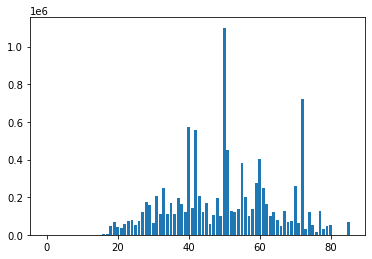

In [20]:
#Okay save this bar for later, we need to aggregate some fields first 
plt.bar('A_AGE', 'PTOTVAL', data = ppdf_filtered)
plt.show()

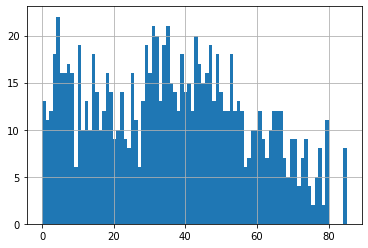

In [45]:
#Let's take a look at how many data points are in each age value
ppdf_filtered['A_AGE'].hist(bins=86)

In [5]:
ppdf_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 98989 to 100004
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERIDNUM  1016 non-null   float64
 1   GTCBSA    1016 non-null   int64  
 2   A_AGE     1016 non-null   int64  
 3   PTOTVAL   1016 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 39.7 KB


In [32]:
#Let's aggregate things by age so we can work with them further
income_by_age = ppdf_filtered.groupby(by=['A_AGE']).agg({'PTOTVAL':['median']})
income_by_age

,PTOTVAL
,median
A_AGE,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
77,40921.0
78,18450.0


In [33]:
#Clean it up so the structure is a traditional dataframe
income_by_age.columns = income_by_age.columns.droplevel(1)
income_by_age = income_by_age.reset_index()
income_by_age

,A_AGE,PTOTVAL
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
77,77,40921.0
78,78,18450.0
79,79,25687.5
80,80,16020.0


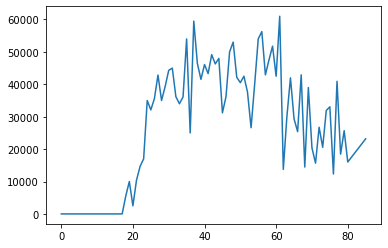

In [34]:
#Now we can plot our new dataframe
plt.plot('A_AGE', 'PTOTVAL', data = income_by_age)
plt.show()